In [2]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [3]:
#wine data set
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'

DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])




Data: shape=(6497, 12)


'describe'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


'skew:'

fixed acidity           1.723290
volatile acidity        1.495097
citric acid             0.471731
residual sugar          1.435404
chlorides               5.399828
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
dtype: float64

'kurtosis'

fixed acidity            5.061161
volatile acidity         2.825372
citric acid              2.397239
residual sugar           4.359272
chlorides               50.898051
free sulfur dioxide      7.906238
total sulfur dioxide    -0.371664
density                  6.606067
pH                       0.367657
sulphates                8.653699
alcohol                 -0.531687
quality                  0.232322
dtype: float64

'variance'

fixed acidity            1.296434
volatile acidity         0.164636
citric acid              0.145318
residual sugar           4.757804
chlorides                0.035034
free sulfur dioxide     17.749400
total sulfur dioxide    56.521855
density                  0.002999
pH                       0.160787
sulphates                0.148806
alcohol                  1.192712
quality                  0.873255
dtype: float64

'range:'

fixed acidity            12.10000
volatile acidity          1.50000
citric acid               1.66000
residual sugar           65.20000
chlorides                 0.60200
free sulfur dioxide     288.00000
total sulfur dioxide    434.00000
density                   0.05187
pH                        1.29000
sulphates                 1.78000
alcohol                   6.90000
quality                   6.00000
dtype: float64

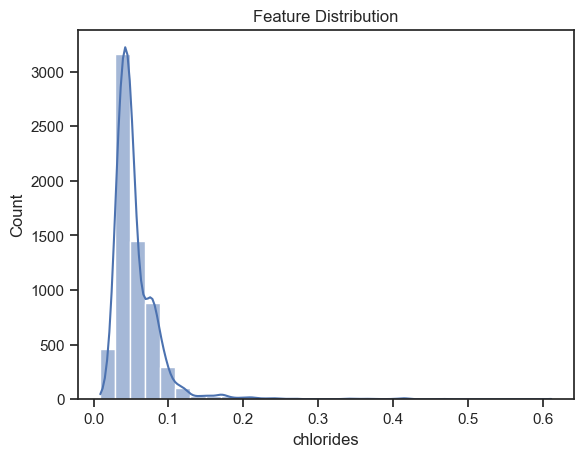

Data: shape after removing outliers=(6211, 12)


'kurtosis'

fixed acidity           5.656866
volatile acidity        2.755859
citric acid             2.628241
residual sugar          4.260740
chlorides               0.022144
free sulfur dioxide     8.524493
total sulfur dioxide   -0.308535
density                 6.891964
pH                      0.361226
sulphates               2.272010
alcohol                -0.559231
quality                 0.189262
dtype: float64

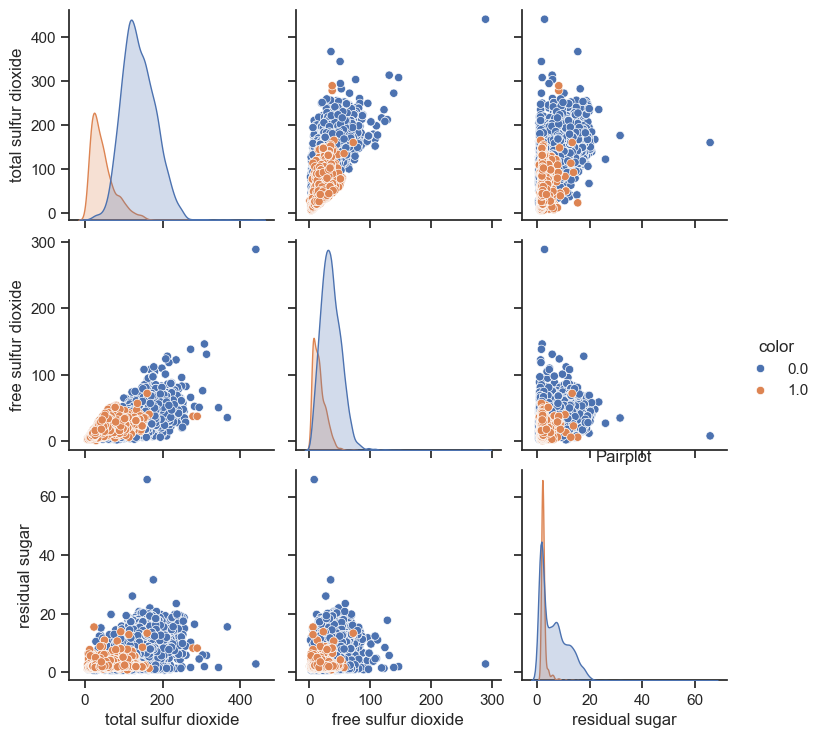

'describe'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6.211000e+03,6.211000e+03,6.211000e+03,6.211000e+03,6.211000e+03,6.211000e+03,6.211000e+03,6.211000e+03,6.211000e+03,6.211000e+03,6.211000e+03,6.211000e+03
mean,-9.152056e-18,1.464329e-16,-4.026905e-16,1.281288e-16,5.857316e-16,-7.321645e-17,7.321645e-17,4.532098e-14,-3.148307e-15,-7.321645e-17,1.372808e-16,-4.324346e-16
std,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00,1.000081e+00
min,-2.659790e+00,-1.583600e+00,-2.243262e+00,-1.026237e+00,-2.260168e+00,-1.690847e+00,-1.986575e+00,-2.499970e+00,-3.107628e+00,-2.243135e+00,-2.105643e+00,-3.241143e+00
25%,-6.149344e-01,-6.467351e-01,-4.660973e-01,-7.763519e-01,-7.470088e-01,-7.825790e-01,-6.462416e-01,-8.061863e-01,-6.862279e-01,-6.991418e-01,-8.512510e-01,-9.545983e-01
50%,-1.430447e-01,-2.719891e-01,-3.957776e-02,-4.848197e-01,-2.606361e-01,-1.013777e-01,3.286057e-02,5.900759e-02,-6.535599e-02,-1.844775e-01,-9.861583e-02,1.886740e-01
75%,3.288451e-01,3.838166e-01,5.291150e-01,5.563667e-01,4.959437e-01,5.798235e-01,6.940917e-01,7.578180e-01,6.176031e-01,5.507572e-01,6.540194e-01,1.886740e-01
max,6.856653e+00,6.223610e+00,9.557113e+00,1.255083e+01,2.927807e+00,1.465798e+01,5.769487e+00,1.476065e+01,4.901619e+00,8.050151e+00,3.664560e+00,3.618491e+00


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.143045,-0.396904,0.315855,3.159333,-0.314677,0.806891,0.944287,2.122162,-1.369187,-0.552095,-1.436634,0.188674
1,-0.693583,-0.209531,0.173682,-0.817999,-0.098512,-0.952879,0.265185,-0.207206,0.493429,-0.258001,-0.851251,0.188674
2,0.722087,-0.334447,0.600202,0.285658,-0.044470,-0.044611,-0.360304,0.158838,0.245080,-0.625618,-0.349494,0.188674
3,0.014252,-0.646735,0.031509,0.618838,0.387861,0.920424,1.230225,0.325221,-0.189530,-0.919712,-0.516746,0.188674
4,0.014252,-0.646735,0.031509,0.618838,0.387861,0.920424,1.230225,0.325221,-0.189530,-0.919712,-0.516746,0.188674


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: color, dtype: float64

In [4]:


print(f'Data: shape={wine[DL].shape}')
display("describe",wine[DL].describe())
display("skew:",wine[DL].skew())
display("kurtosis", wine[DL].kurtosis())
display("variance", wine[DL].std())

feature_range = wine[DL].max() - wine[DL].min()
display("range:")
display(feature_range)

sns.histplot(wine['chlorides'], bins=30, kde=True)  
plt.title("Feature Distribution")
plt.show()

#removing outliers from high kurtosis features
Q1 = wine['chlorides'].quantile(0.25)
Q3 = wine['chlorides'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
wine = wine[(wine['chlorides'] >= lower_bound) & (wine['chlorides'] <= upper_bound)]
print(f'Data: shape after removing outliers={wine[DL].shape}')
display("kurtosis", wine[DL].kurtosis())

subset = ['total sulfur dioxide', 'free sulfur dioxide', 'residual sugar', 'color']
sns.pairplot(wine[subset], hue='color')
plt.title("Pairplot")
plt.show()

#z-score normalization
scaler = StandardScaler()
wine = wine.astype(float)
wine.iloc[:, :-1] = scaler.fit_transform(wine.iloc[:, :-1])

display("describe",wine[DL].describe())

X = wine[DL]
y = wine[C]

display(X.head())
display(y.head())


In [9]:
#KNN classification
k_performance = {}

'''
for k in range(1, 50):
    

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    accuracies = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, y_pred))
        
    k_performance[k] = np.mean(accuracies)

for k, acc in k_performance.items():
    print(f'K={k}, Accuracy={acc:.4f}')
    
plt.plot(k_performance.keys(), k_performance.values(), marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy') 
plt.title('KNN Accuracy Performance vs K')
plt.show()
'''

#training on the entire dataset for the best k value of 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model with k=4
best_k = 4
model = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean', weights='distance')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with k={best_k} on 80/20 split: {accuracy:.4f}')



Accuracy with k=4 on 80/20 split: 0.9920


In [2]:
#Decision Tree Classifier

In [ ]:
#Random Forest Classifier

In [ ]:
#Summarize Results